**SPA611 ASSIGNMENT 1 ANSWERS**

**Kashish Verma 220508**

Q) **RA and Dec that is published is usually for the epoch of 2000, called J2000. Do you think the RA and Dec would change today? Use astropy to find the RA and Dec of a radio source – Cygnus - A (RA 19h 59m 28.3566s  , Dec +40° 44′ 02.096″)**

Yes, the coordinates change because Earth's axis precesses (wobbles) due to gravitational torque from the Sun and Moon,taking about 26,000 years to complete one cycle, which causes the reference grid of the celestial sphere to drift relative to the background stars.As the axis shifts, the coordinate grid moves with it (specifically, the Vernal Equinox moves westward). This causes the coordinates of "fixed" objects like Cygnus A to change over time.

In [1]:
!pip install astropy

In [3]:
import astropy.units as au
from astropy.coordinates import SkyCoord, FK5
from astropy.time import Time

In [9]:
cygnus_ra = '19h59m28.3566s'
cygnus_dec = '+40d44m02.096s'
initial_coords = SkyCoord(cygnus_ra, cygnus_dec, frame='icrs')
obs_date = Time.now()
current_coords = initial_coords.transform_to(FK5(equinox=obs_date))
print(f"Target Object: Cygnus A")
print(f"Observation Date: {obs_date.iso.split()[0]}")
print("="*30)

# J2000 (Reference)
print(f"Original (J2000):")
print(f"  RA:  {initial_coords.ra.to_string(unit=au.hour, sep='hms', precision=2)}")
print(f"  Dec: {initial_coords.dec.to_string(unit=au.deg, sep='dms', precision=1)}")

print("-" * 30)

# JNow (Precessed)
print(f"Precessed (Today):")
print(f"  RA:  {current_coords.ra.to_string(unit=au.hour, sep='hms', precision=2)}")
print(f"  Dec: {current_coords.dec.to_string(unit=au.deg, sep='dms', precision=1)}")

# Calculating the drift
chnge_coords = SkyCoord(current_coords.ra, current_coords.dec, frame='icrs')
drift = initial_coords.separation(chnge_coords).arcmin

print("="*30)
print(f"Total Coordinate Drift: {drift:.3f} arcminutes")

Target Object: Cygnus A
Observation Date: 2026-01-21
Original (J2000):
  RA:  19h59m28.36s
  Dec: 40d44m02.1s
------------------------------
Precessed (Today):
  RA:  20h00m22.48s
  Dec: 40d48m23.1s
Total Coordinate Drift: 11.132 arcminutes


**Explaination of the code**


1.   Defining the Cygnus A's position using SkyCoord in the standard J2000 reference frame (technically called icrs).
2.   The current date with Time.now() and  .transform_to(FK5) to mathematically shift the coordinates to today's epoch.


1.   To measure the coordinate drift, the code creates a temporary object. It takes the new numerical values (from today) but forces them back into the old reference frame (J2000).
2.   The CODE initial_coords.transform_to(FK5(equinox=obs_date)) performs the calculation by using the provided date (obs_date) to construct time-specific rotation matrices (based on IAU precession models) and mathematically multiplying them against the original J2000 coordinate vector to shift it to the current epoch.








**Q) What will be this source’s azimuth and elevation when observing from IIT Kanpur?**

In [12]:

from astropy.coordinates import SkyCoord, EarthLocation, AltAz

iit_kanpur = EarthLocation(lat=26.51*au.deg, lon=80.23*au.deg, height=126*au.m)
cyg_a = SkyCoord('19h59m28.3566s', '+40d44m02.096s', frame='icrs')
observe_time = Time.now()

aa_frame = AltAz(location=iit_kanpur, obstime=observe_time)
cyg_a_altaz = cyg_a.transform_to(aa_frame)

# 5. Output Results
print(f"Location:  IIT Kanpur")
print(f"Time:      {observe_time}")
print("-" * 30)
print(f"Azimuth:   {cyg_a_altaz.az.deg:.2f} degrees")
print(f"Elevation: {cyg_a_altaz.alt.deg:.2f} degrees")


Location:  IIT Kanpur
Time:      2026-01-21 15:19:10.416769
------------------------------
Azimuth:   324.65 degrees
Elevation: -8.75 degrees


**Explaination of the code**

1.  EarthLocation(...):   defines IIT Kanpur with a specific Latitude, Longitude, and Elevation. This sets the angle of the ground relative to the sky. For an observer at IIT Kanpur (26.5° N), the North Star is 26.5° above the horizon. If we moved to the equator, the whole sky would tilt. The code needs this angle to establish local "Up" and "Down.
2. Time.now() :  This freezes the Earth's rotation. To convert coordinates, the code calculates the Local Sidereal Time (LST).LST effectively tells "Which line of Right Ascension is currently passing directly overhead?"

3. AltAz(...): Creates a coordinate frame combining the Location and Time.
It defines the Horizon (0° Elevation) and the Zenith (90° straight up) specific to that exact moment at IIT Kanpur.

4. .transform_to(aa_frame): Converts the J2000 coordinates to the AltAz frame.
This performs Spherical Trigonometry.




**Q)  Show in a polar plot, how the azimuth and elevation of this source would change when observing at IITK.**

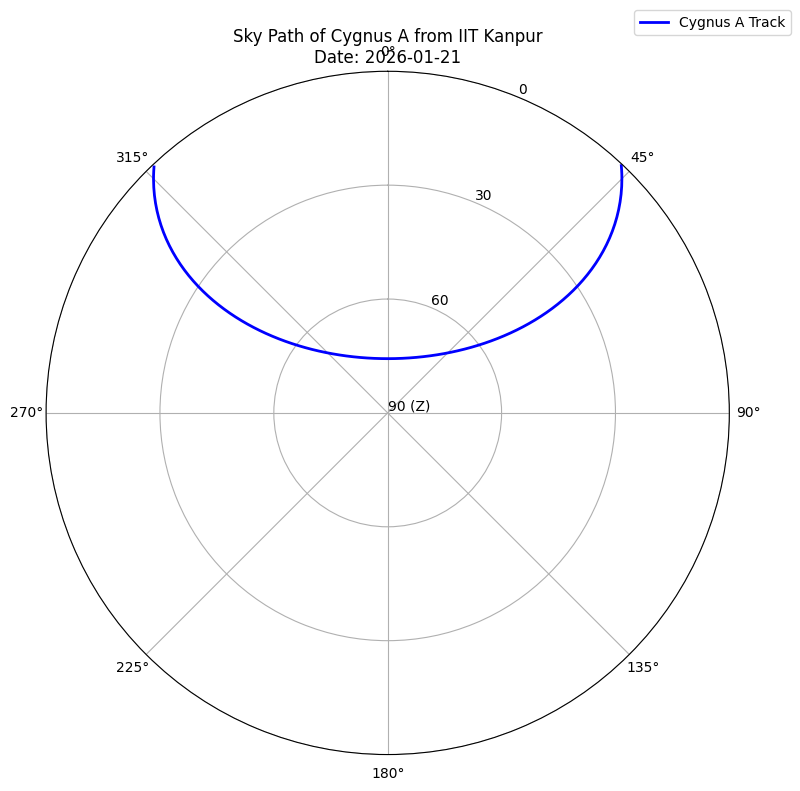

In [14]:
import matplotlib.pyplot as plt
import numpy as np


iit_kanpur = EarthLocation(lat=26.51*au.deg, lon=80.23*au.deg, height=126*au.m)
cyg_a = SkyCoord('19h59m28.3566s', '+40d44m02.096s', frame='icrs')

now = Time.now()
time_offsets = np.linspace(0, 24, 300) * au.hour
times = now + time_offsets

aa_frame = AltAz(location=iit_kanpur, obstime=times)
cyg_a_altaz = cyg_a.transform_to(aa_frame)

mask = cyg_a_altaz.alt.deg > 0
azimuths = cyg_a_altaz.az[mask]
altitudes = cyg_a_altaz.alt[mask]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

theta = azimuths.rad
r = 90 - altitudes.deg

ax.plot(theta, r, label='Cygnus A Track', color='blue', lw=2)

ax.set_rlim(0, 90)
ax.set_yticks([0, 30, 60, 90])
ax.set_yticklabels(['90 (Z)', '60', '30', '0'])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.title(f"Sky Path of Cygnus A from IIT Kanpur\nDate: {now.iso.split()[0]}")
plt.tight_layout()
plt.show()

**Explaination of code**

It defines the observer (IIT Kanpur) and the target (Cygnus A) using standard J2000 coordinates.

It creates a timeline of the next 24 hours (times) and calculates the star's local Altitude and Azimuth for every single moment in that list.

It applies a mask to remove any data points where the star is below the horizon (Altitude < 0), so the plot only shows when it is visible.

Angle (theta): Uses the Azimuth (compass direction). It sets North to the top and direction to clockwise to match a real compass.

Radius (r): Uses 90 - altitude. This inverts the plot so that 90° (Zenith/overhead) is at the center of the circle, and 0° (Horizon) is at the outer edge.





**Q)  Plot how Sun’s RA and Dec changes over a year. Compare this with respect to that of Cygnus over a year?**

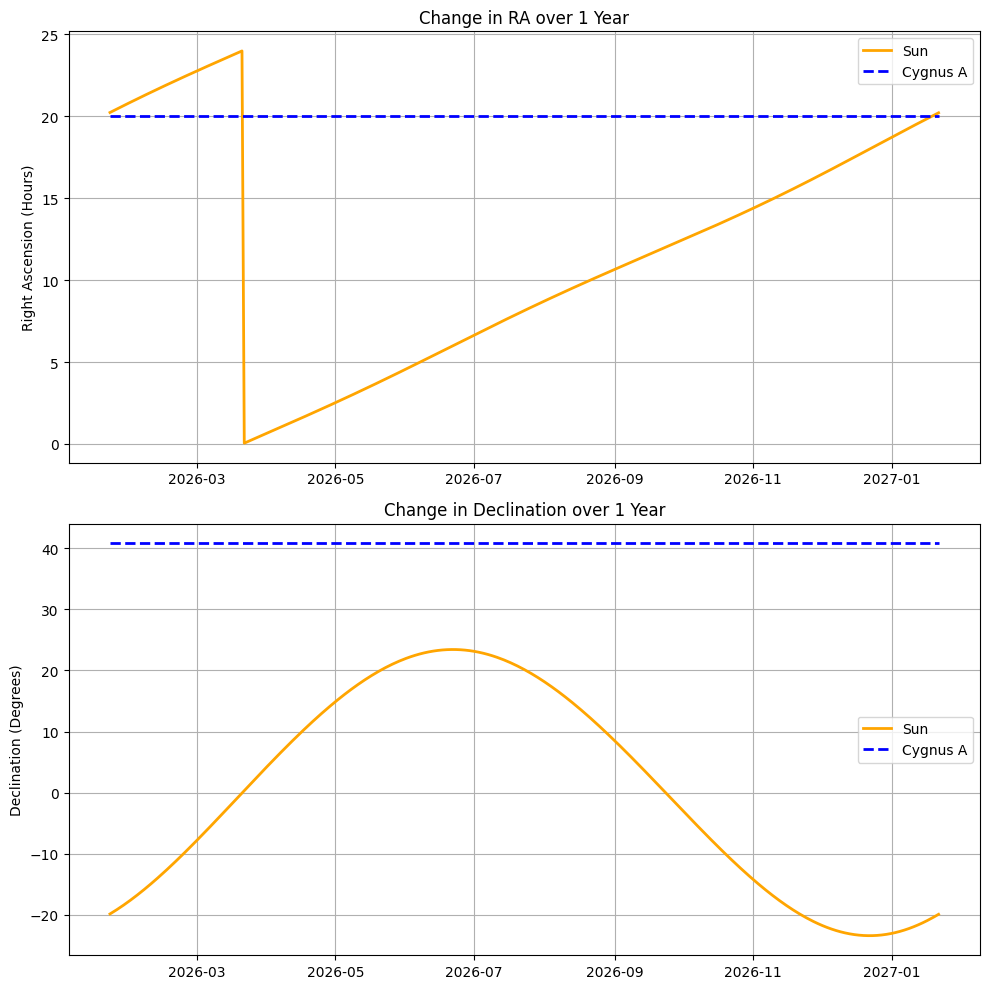

In [18]:


#    We create 365 time points, one for each day starting today.
start_time = Time.now()
time_offsets = np.linspace(0, 365, 365) * au.day
times = start_time + time_offsets


#    A. The Sun: astropy has a built-in function to find the Sun's position.
sun_coords = get_sun(times)

#    B. Cygnus A: We calculate its apparent position (precession) for each day.
cyg_a_j2000 = SkyCoord('19h59m28.3566s', '+40d44m02.096s', frame='icrs')
cyg_a_now = cyg_a_j2000.transform_to(FK5(equinox=times))

# 3. PLOTTING
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# --- Plot 1: Right Ascension (RA) ---
# Sun's RA (Convert to hours)
ax1.plot(times.datetime, sun_coords.ra.hour, label='Sun', color='orange', lw=2)
# Cygnus RA
ax1.plot(times.datetime, cyg_a_now.ra.hour, label='Cygnus A', color='blue', lw=2, linestyle='--')

ax1.set_ylabel('Right Ascension (Hours)')
ax1.set_title('Change in RA over 1 Year')
ax1.legend()
ax1.grid(True)

# --- Plot 2: Declination (Dec) ---
# Sun's Dec (Degrees)
ax2.plot(times.datetime, sun_coords.dec.deg, label='Sun', color='orange', lw=2)
# Cygnus Dec
ax2.plot(times.datetime, cyg_a_now.dec.deg, label='Cygnus A', color='blue', lw=2, linestyle='--')

ax2.set_ylabel('Declination (Degrees)')
ax2.set_title('Change in Declination over 1 Year')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

**Explaination of code**

get_sun(times) is a  built-in function. It calculates the precise RA and Dec of the Sun for every single day. It accounts for Earth's orbit, tilt, and speed.

cyg_a_now = ... .transform_to(...): This calculates the position of Cygnus A.

Unlike the Sun, Cygnus A doesn't actually move.
However, the coordinate grid shifts slightly (precession). This line calculates that tiny shift so we can compare it to the massive movement of the Sun.


fig, (ax1, ax2): Creates a figure with two stacked charts.

ax1.plot(...) (Right Ascension): Plots how "East/West" the objects are.

Sun: We see a diagonal line rising from 0 to 24 hours (as the Sun moves continuously eastward through the Zodiac).

Cygnus: We see a flat line (because it stays in one constellation).

ax2.plot(...) (Declination): Plots how "North/South" the objects are.

Sun:We see a Sine Wave. This visualizes the seasons. When the wave is high (+23.5°), it is Summer (Northern Hemisphere). When low (-23.5°), it is Winter.

Cygnus: We see a flat line.